In [ ]:
from keras import backend as k

In [ ]:
k.clear_session()

In [ ]:
import tensorflow as tf
import os, shutil
import numpy as np
import tensorflow_datasets as tfds
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Input, BatchNormalization, Lambda
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
original_dataset_dir = '/content/drive/MyDrive/radiografia'
train_dir = "/content/drive/MyDrive/radiografia/chest_x_ray/train"
validation_images = '/content/drive/MyDrive/radiografia/chest_x_ray/validation'
test_dir = '/content/drive/MyDrive/radiografia/chest_x_ray/test'
test_dir_1 = '/content/drive/MyDrive/radiografia/chest_x_ray/test_1'

In [ ]:
test_dir = '/content/drive/MyDrive/radiografia/chest_x_ray/test'
os.mkdir(test_dir)

In [ ]:
os.makedirs('/content/drive/MyDrive/radiografia/chest_x_ray/test/NORMAL', exist_ok=True) 
os.makedirs('/content/drive/MyDrive/radiografia/chest_x_ray/test/PNEUMONIA', exist_ok=True) 

In [ ]:
test_normal = '/content/drive/MyDrive/radiografia/chest_x_ray/test/NORMAL'
test_pneumonia = '/content/drive/MyDrive/radiografia/chest_x_ray/test/PNEUMONIA'

In [ ]:
t_normal = "/content/drive/MyDrive/radiografia/chest_x_ray/train/NORMAL"
t_pneumonia = "/content/drive/MyDrive/radiografia/chest_x_ray/train/PNEUMONIA"

In [ ]:
filenames = os.listdir(t_normal)
for filename  in filenames[:10]:
  src = os.path.join(t_normal, filename)
  dst = os.path.join(test_normal, filename)
  shutil.move(src, dst)

filenames = os.listdir(t_pneumonia)
for filename  in filenames[:10]:
  src = os.path.join(t_pneumonia, filename)
  dst = os.path.join(test_pneumonia, filename)
  shutil.move(src, dst)

In [ ]:
print('total t_normal images:', len(os.listdir("/content/drive/MyDrive/radiografia/chest_x_ray/train/NORMAL")))
print('total t_pneumonia images:', len(os.listdir("/content/drive/MyDrive/radiografia/chest_x_ray/train/PNEUMONIA")))
print('total v_normal images:', len(os.listdir("/content/drive/MyDrive/radiografia/chest_x_ray/validation/NORMAL")))
print('total v_pneumonia images:', len(os.listdir("/content/drive/MyDrive/radiografia/chest_x_ray/validation/PNEUMONIA")))
print('total test_normal images:', len(os.listdir("/content/drive/MyDrive/radiografia/chest_x_ray/test/NORMAL")))
print('total test_pneumonia images:', len(os.listdir("/content/drive/MyDrive/radiografia/chest_x_ray/test/PNEUMONIA")))
print('total test_normal_predict images:', len(os.listdir("/content/drive/MyDrive/radiografia/chest_x_ray/test_1/NORMAL")))
print('total test_pneumonia_predict images:', len(os.listdir("/content/drive/MyDrive/radiografia/chest_x_ray/test_1/PNEUMONIA")))

total t_normal images: 1339
total t_pneumonia images: 3873
total v_normal images: 234
total v_pneumonia images: 390
total test_normal images: 234
total test_pneumonia images: 390
total test_normal_predict images: 10
total test_pneumonia_predict images: 10


In [ ]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

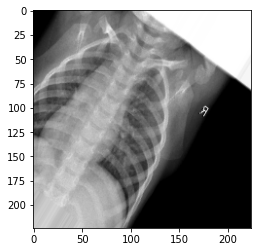

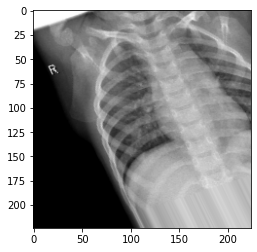

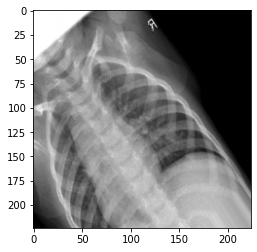

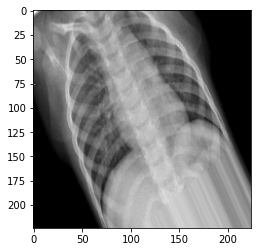

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras import utils
import numpy as np
#filenames = os.listdir(t_yeast)
fnames = [os.path.join(t_normal, fname) for
          fname in os.listdir(t_normal)]
img=fnames[2]
#fnames = [os.path.join(train_cats_dir, fname) for
 #         fname in os.listdir(train_cats_dir)]
#img_path = fnames[3]
img = utils.load_img(img, target_size=(224, 224))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i=0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break
plt.show()  

In [ ]:
filenames = os.listdir(t_normal)

In [ ]:
filenames [1]

'IM-0536-0001.jpeg'

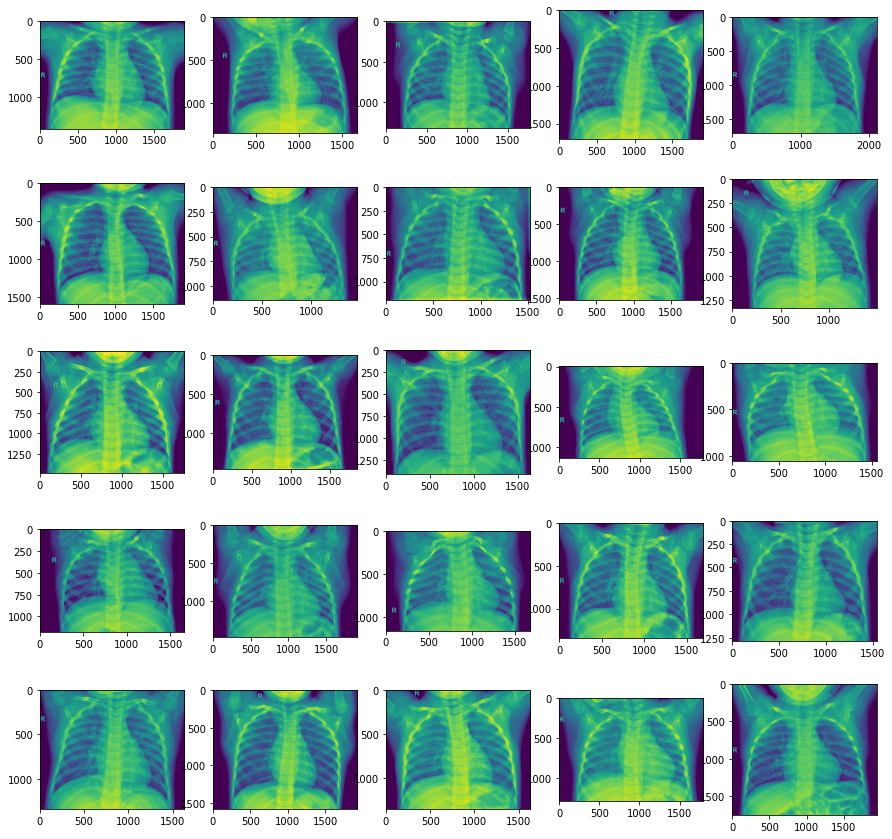

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras import utils
plt.figure(figsize=(15,15))
#TAMANO_IMG=100
#fnames = [os.path.join(t_yeast, fname) for
      #    fname in os.listdir(t_yeast)]
#img_path = fnames[3]
#img = utils.load_img(img_path, target_size=(150, 150))

for i, nombreimg in enumerate(filenames[:25]):
  plt.subplot(5,5,i+1)

  imagen = mpimg.imread(t_normal + '/' + nombreimg)

  plt.imshow(imagen)

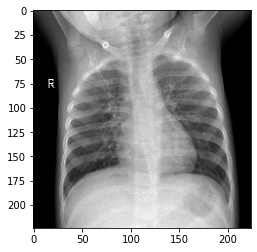

In [ ]:
from tensorflow.keras import utils
img_path = fnames[1]
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

img = utils.load_img(img_path, target_size=(224, 224))
img_tensor = utils.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

plt.imshow(img_tensor[0])
plt.show()

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode="binary")

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_images,
    target_size=(224,224),
    batch_size=32,
    class_mode = "binary")

Found 5212 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
from tensorflow.keras import regularizers
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3),  kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Conv2D(64, (3, 3),  kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.MaxPooling2D((2, 2),  strides=(2, 2)))

model.add(layers.Conv2D(128, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

model.add(layers.Conv2D(256, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu'))

model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.legacy.RMSprop(learning_rate=0.0005), 
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    epochs=30,
    validation_data= validation_generator
    )

Epoch 1/30
163/163 [==============================] - 560s 3s/step - loss: 0.6438 - accuracy: 0.8026 - val_loss: 0.7242 - val_accuracy: 0.8237
Epoch 2/30
163/163 [==============================] - 83s 511ms/step - loss: 0.2590 - accuracy: 0.9269 - val_loss: 1.3872 - val_accuracy: 0.6907
Epoch 3/30
163/163 [==============================] - 82s 505ms/step - loss: 0.1837 - accuracy: 0.9541 - val_loss: 0.7073 - val_accuracy: 0.8125
Epoch 4/30
163/163 [==============================] - 76s 466ms/step - loss: 0.1562 - accuracy: 0.9601 - val_loss: 0.8220 - val_accuracy: 0.8045
Epoch 5/30
163/163 [==============================] - 76s 467ms/step - loss: 0.1265 - accuracy: 0.9678 - val_loss: 0.6838 - val_accuracy: 0.8397
Epoch 6/30
163/163 [==============================] - 79s 487ms/step - loss: 0.1077 - accuracy: 0.9735 - val_loss: 1.3290 - val_accuracy: 0.7340
Epoch 7/30
163/163 [==============================] - 75s 461ms/step - loss: 0.0970 - accuracy: 0.9754 - val_loss: 1.2833 - val_accu

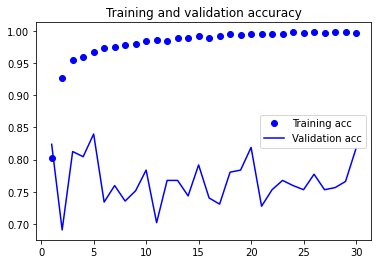

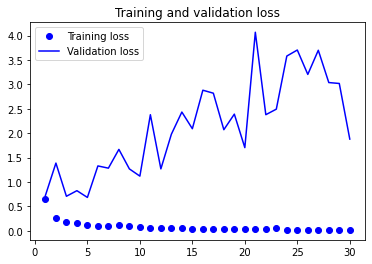

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

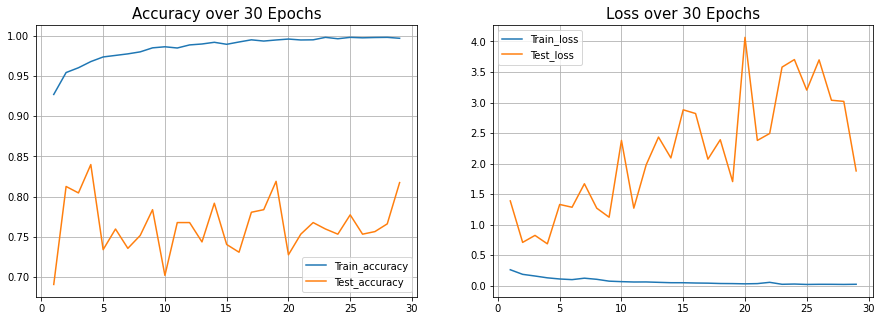

In [ ]:
epoch=30
def plot_acc_loss(result, epochs):
 acc = result.history["accuracy"]
 loss = result.history["loss"]
 val_acc = result.history["val_accuracy"]
 val_loss = result.history["val_loss"]
 plt.figure(figsize=(15, 5))
 plt.subplot(121)
 plt.plot(range(1,epochs), acc[1:], label="Train_accuracy")
 plt.plot(range(1,epochs), val_acc[1:], label="Test_accuracy")
 plt.title("Accuracy over " + str(epochs) + " Epochs", size=15)
 plt.legend()
 plt.grid(True)
 plt.subplot(122)
 plt.plot(range(1,epochs), loss[1:], label="Train_loss")
 plt.plot(range(1,epochs), val_loss[1:], label="Test_loss")
 plt.title("Loss over " + str(epochs) + " Epochs", size=15)
 plt.legend()
 plt.grid(True)
 plt.show()
 
plot_acc_loss(history, 30)

In [ ]:
model.save("/content/drive/MyDrive/radiografia/chest_x_ray/modelos/model2_1.h")
model.save_weights("/content/drive/MyDrive/radiografia/chest_x_ray/modelos/pesos2_1.h")

In [ ]:
from keras.models import load_model
model = load_model("/content/drive/MyDrive/radiografia/chest_x_ray/modelos/model2_1.h")

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')
test_loss, test_acc = model.evaluate(test_generator)
print("test loss", test_loss)
print('test acc:', test_acc)

Found 624 images belonging to 2 classes.
20/20 [==============================] - 6s 315ms/step - loss: 1.8787 - accuracy: 0.8173
test loss 1.8787246942520142
test acc: 0.817307710647583


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
 test_dir,
 target_size=(224,224),
 batch_size=32,
 shuffle=False,
 seed=42,
 class_mode="binary")

test_generator.reset()
x = model.evaluate(test_generator,
                             steps = np.ceil(len(test_generator) / 32),
                             use_multiprocessing = False,
                             verbose = 1,
                             workers=1)
print("Test loss:" , x[0])
print("Test accuracy:",x[1])

Found 624 images belonging to 2 classes.
1/1 [==============================] - 1s 832ms/step - loss: 3.8953 - accuracy: 0.5625
Test loss: 3.8952581882476807
Test accuracy: 0.5625


________________________________________________________________________________________________________________
________________________________________________________________________________________________________________
_________________________________________________________________________________________________________________

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,  
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3, 
    horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(224, 224), 
    batch_size=32,
    class_mode="binary") 

validation_generator = validation_datagen.flow_from_directory(
    validation_images, 
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

Found 5212 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
from tensorflow.keras import regularizers
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3),  kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Conv2D(64, (3, 3),  kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.MaxPooling2D((2, 2),  strides=(2, 2)))

model.add(layers.Conv2D(128, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

model.add(layers.Conv2D(256, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu'))

model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.legacy.RMSprop(learning_rate=0.0005), 
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    epochs=30,
    validation_data= validation_generator
    )

Epoch 1/30
163/163 [==============================] - 1202s 7s/step - loss: 0.7729 - accuracy: 0.7429 - val_loss: 0.7560 - val_accuracy: 0.6218
Epoch 2/30
163/163 [==============================] - 131s 804ms/step - loss: 0.5166 - accuracy: 0.7857 - val_loss: 0.7882 - val_accuracy: 0.6266
Epoch 3/30
163/163 [==============================] - 129s 791ms/step - loss: 0.4717 - accuracy: 0.8179 - val_loss: 0.5246 - val_accuracy: 0.7869
Epoch 4/30
163/163 [==============================] - 132s 809ms/step - loss: 0.4052 - accuracy: 0.8358 - val_loss: 0.6616 - val_accuracy: 0.6490
Epoch 5/30
163/163 [==============================] - 129s 792ms/step - loss: 0.3974 - accuracy: 0.8421 - val_loss: 0.4714 - val_accuracy: 0.8077
Epoch 6/30
163/163 [==============================] - 133s 813ms/step - loss: 0.3727 - accuracy: 0.8597 - val_loss: 0.6354 - val_accuracy: 0.6683
Epoch 7/30
163/163 [==============================] - 133s 814ms/step - loss: 0.3537 - accuracy: 0.8588 - val_loss: 0.5542 - v

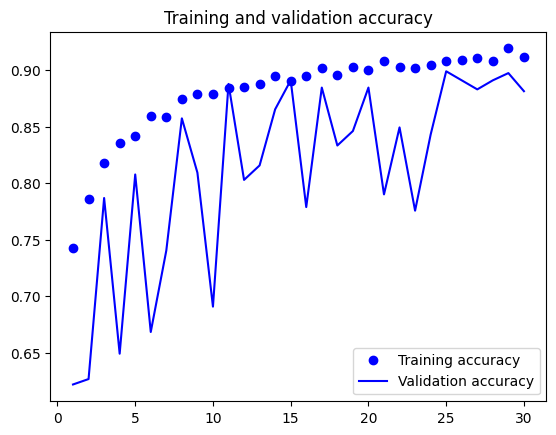

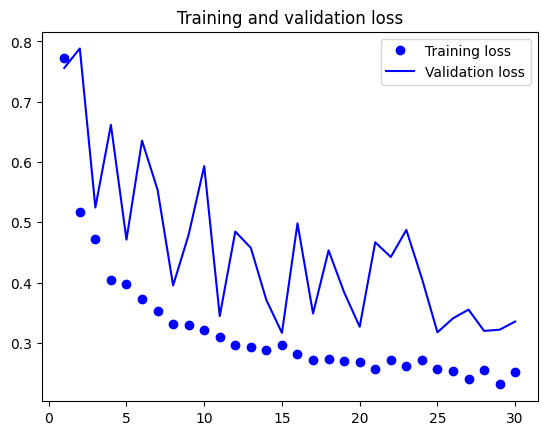

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

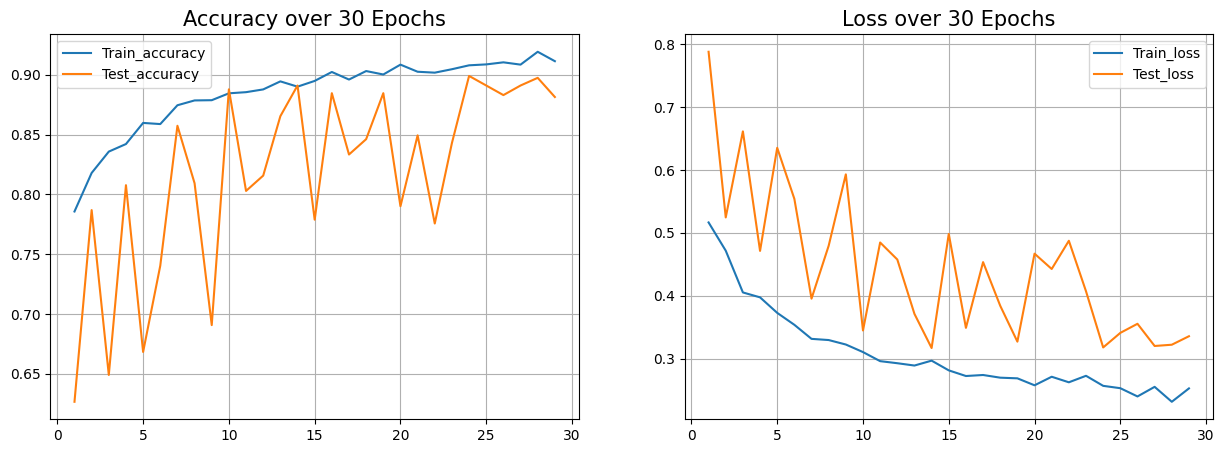

In [ ]:
def plot_acc_loss(result, epochs):
 acc = result.history["accuracy"]
 loss = result.history["loss"]
 val_acc = result.history["val_accuracy"]
 val_loss = result.history["val_loss"]
 plt.figure(figsize=(15, 5))
 plt.subplot(121)
 plt.plot(range(1,epochs), acc[1:], label="Train_accuracy")
 plt.plot(range(1,epochs), val_acc[1:], label="Test_accuracy")
 plt.title("Accuracy over " + str(epochs) + " Epochs", size=15)
 plt.legend()
 plt.grid(True)
 plt.subplot(122)
 plt.plot(range(1,epochs), loss[1:], label="Train_loss")
 plt.plot(range(1,epochs), val_loss[1:], label="Test_loss")
 plt.title("Loss over " + str(epochs) + " Epochs", size=15)
 plt.legend()
 plt.grid(True)
 plt.show()
 
plot_acc_loss(history, 30)

**Predict**

In [ ]:
model.save("/content/drive/MyDrive/radiografia/chest_x_ray/modelos/model2_2.h")
model.save_weights("/content/drive/MyDrive/radiografia/chest_x_ray/modelos/pesos2_2.h")

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    validation_images,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')
test_loss, test_acc = model.evaluate(test_generator)
print("test loss", test_loss)
print('test acc:', test_acc)

Found 624 images belonging to 2 classes.
20/20 [==============================] - 12s 585ms/step - loss: 0.3355 - accuracy: 0.8814
test loss 0.3355235457420349
test acc: 0.8814102411270142


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir_1,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')
test_loss, test_acc = model.evaluate(test_generator)
print("test loss", test_loss)
print('test acc:', test_acc)

Found 20 images belonging to 2 classes.
1/1 [==============================] - 1s 1s/step - loss: 0.2343 - accuracy: 0.9000
test loss 0.23432926833629608
test acc: 0.8999999761581421


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
 test_dir_1,
 target_size=(224,224),
 batch_size=32,
 shuffle=False,
 seed=42,
 class_mode="binary")

test_generator.reset()
x = model.evaluate(test_generator,
                             steps = np.ceil(len(test_generator) / 32),
                             use_multiprocessing = False,
                             verbose = 1,
                             workers=1)
print("Test loss:" , x[0])
print("Test accuracy:",x[1])

Found 20 images belonging to 2 classes.
1/1 [==============================] - 1s 567ms/step - loss: 0.2394 - accuracy: 0.9000
Test loss: 0.23939454555511475
Test accuracy: 0.8999999761581421


1/1 [==============================] - 0s 354ms/step
Predictions finished
NORMAL/IM-0511-0001.jpeg


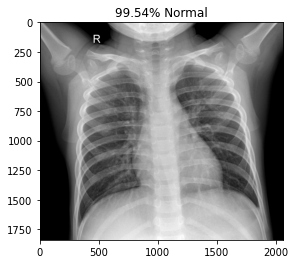

NORMAL/IM-0526-0001.jpeg


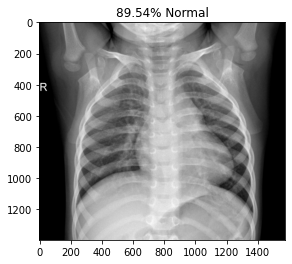

NORMAL/IM-0531-0001.jpeg


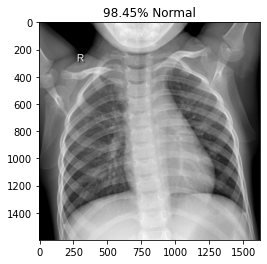

NORMAL/IM-0533-0001.jpeg


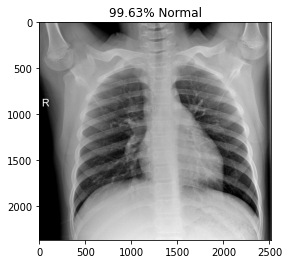

NORMAL/IM-0534-0001.jpeg


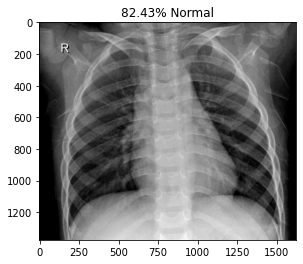

NORMAL/IM-0535-0001.jpeg


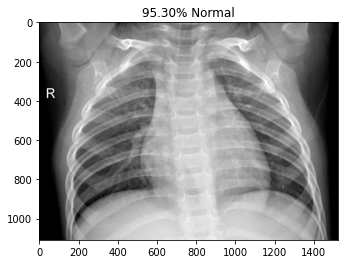

NORMAL/IM-0539-0001.jpeg


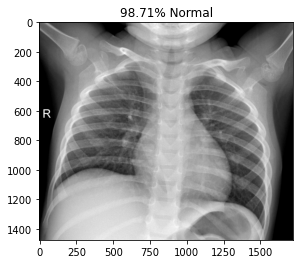

NORMAL/IM-0545-0001-0002.jpeg


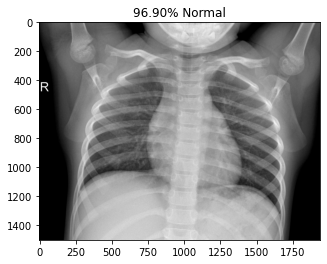

NORMAL/IM-0547-0001.jpeg


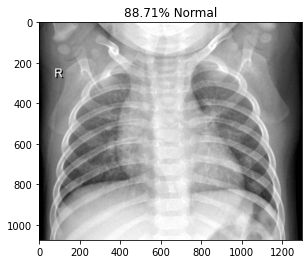

NORMAL/IM-0549-0001.jpeg


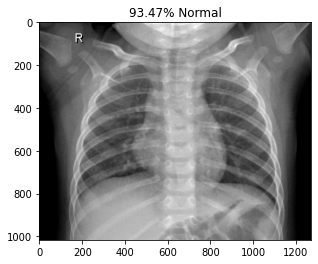

PNEUMONIA/person501_virus_1010.jpeg


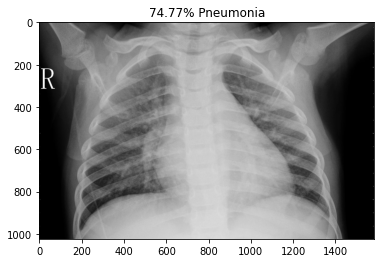

PNEUMONIA/person502_bacteria_2122.jpeg


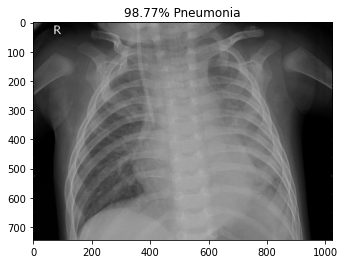

PNEUMONIA/person502_virus_1012.jpeg


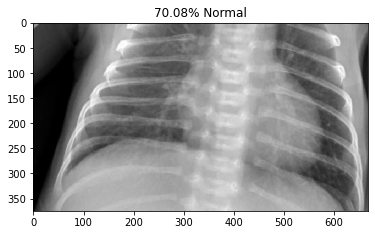

PNEUMONIA/person508_bacteria_2142.jpeg


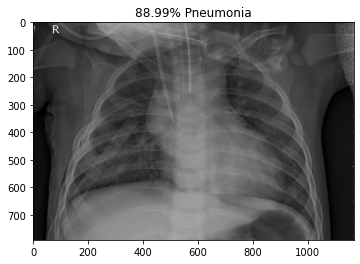

PNEUMONIA/person508_virus_1021.jpeg


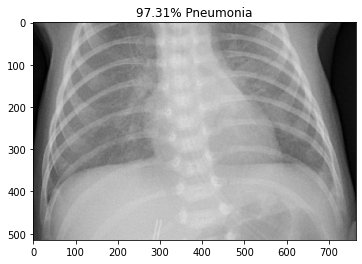

PNEUMONIA/person516_bacteria_2192.jpeg


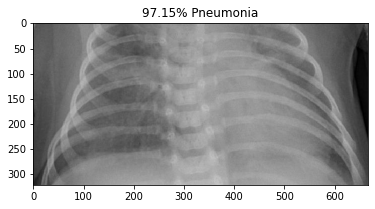

PNEUMONIA/person520_virus_1039.jpeg


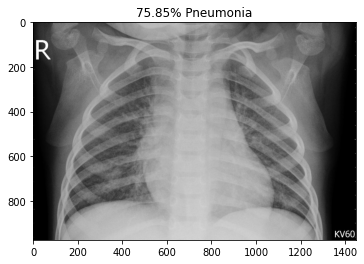

PNEUMONIA/person536_bacteria_2259.jpeg


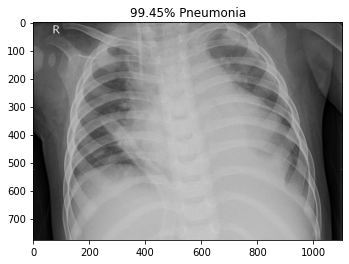

PNEUMONIA/person53_bacteria_253.jpeg


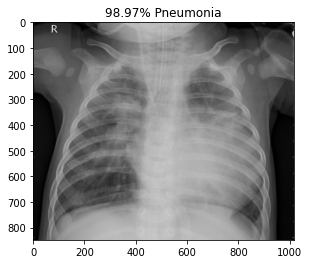

PNEUMONIA/person540_virus_1070.jpeg


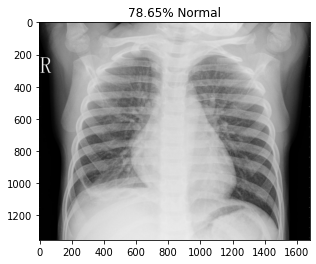

In [ ]:

test_generator.reset() 
pred = model.predict(test_generator,1000,verbose=1)
print("Predictions finished")
import cv2
import matplotlib.image as mpimg
for index, probability in enumerate(pred):
 image_path = test_dir_1 + "/" +test_generator.filenames[index]
 image = mpimg.imread(image_path)
 #BGR TO RGB conversion using CV2
 image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
 pixels = np.array(image)
 plt.imshow(pixels)
 
 print(test_generator.filenames[index])
 if probability > 0.5:
   plt.title("%.2f" % (probability[0]*100) + "% Pneumonia")
 else:
   plt.title("%.2f" % ((1-probability[0])*100) + "% Normal")
 plt.show()

**Visualización de las convnets**

In [ ]:
from tensorflow.keras import utils
img_path = '/content/drive/MyDrive/radiografia/chest_x_ray/test_1/NORMAL/IM-0549-0001.jpeg'
from keras.preprocessing import image
import numpy as np
img = utils.load_img(img_path, target_size=(224, 224))
img_tensor = utils.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

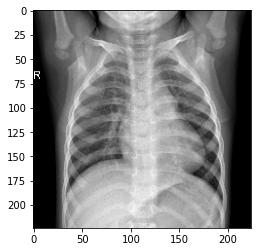

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

In [ ]:
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [ ]:
activations = activation_model.predict(img_tensor)

1/1 [==============================] - 0s 280ms/step


In [ ]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 222, 222, 32)


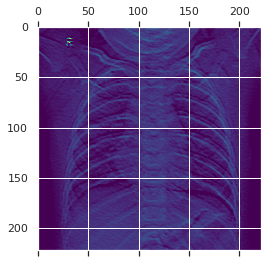

In [ ]:
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0, :, :, 16], cmap='viridis')

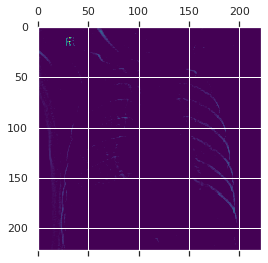

In [ ]:
plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')

<ipython-input-128-67c32b21b77d>:18: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()


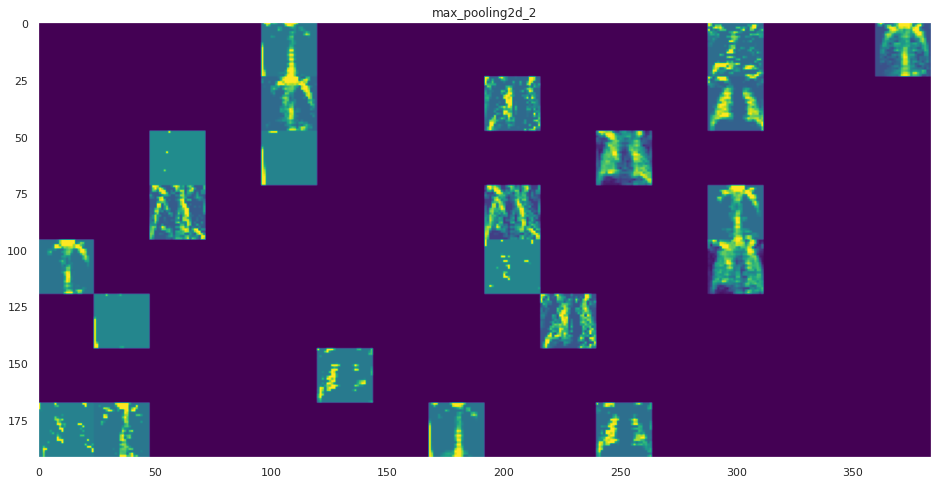

In [ ]:
layer_names = []
for layer in model.layers[:8]:
  layer_names.append(layer.name)

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
  n_features = layer_activation.shape[-1]
  size = layer_activation.shape[1]
  n_cols = n_features // images_per_row
  display_grid = np.zeros((size * n_cols, images_per_row * size))
  for col in range(n_cols):
    for row in range(images_per_row):
      channel_image = layer_activation[0,
                                       :, :,
                                       col * images_per_row + row]
      channel_image -= channel_image.mean()
      channel_image /= channel_image.std()
      channel_image *= 64
      channel_image += 128
      channel_image = np.clip(channel_image, 0, 255).astype('uint8')
      display_grid[col * size : (col + 1) * size,
                   row * size : (row + 1) * size] = channel_image

scale = 1. / size
plt.figure(figsize=(scale * display_grid.shape[1],
scale * display_grid.shape[0]))
plt.title(layer_name)
plt.grid(False)
plt.imshow(display_grid, aspect='auto', cmap='viridis')

**Mapa de calor**

In [ ]:
from keras.models import load_model
model = load_model("/content/drive/MyDrive/radiografia/chest_x_ray/modelos/model2_1.h")

In [ ]:
for idx in range(len(model.layers)):
  print(model.get_layer(index = idx).name)

conv2d
max_pooling2d
conv2d_1
conv2d_2
max_pooling2d_1
conv2d_3
conv2d_4
max_pooling2d_2
conv2d_5
max_pooling2d_3
flatten
dropout
dense
dense_1


**NORMAL**

In [ ]:
img_NORMAL ='/content/drive/MyDrive/radiografia/chest_x_ray/test_1/NORMAL/IM-0549-0001.jpeg'

In [ ]:
last_conv_layer_name = "conv2d_5"

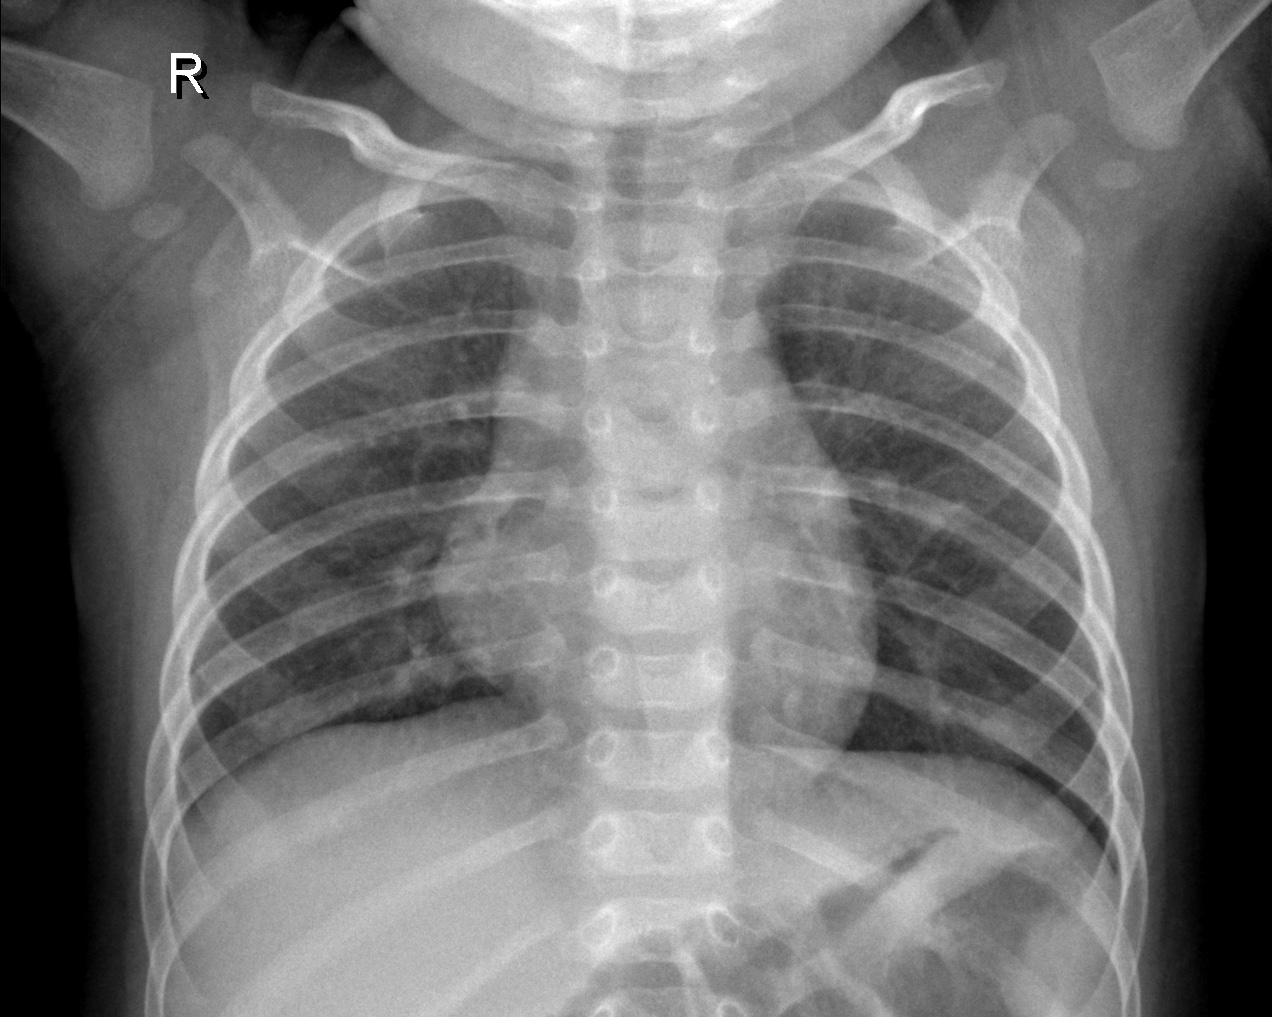

In [ ]:
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm
img_size = (224, 224)

# The local path to our target image
img_path = img_NORMAL
display(Image(img_path))

In [ ]:



def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

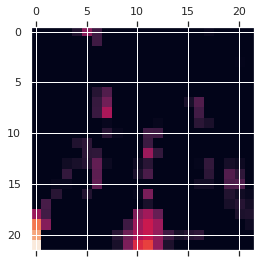

In [ ]:
#img_array = preprocess_input(get_img_array(img_path, size=img_size))
image = cv2.imread(img_path)
image = cv2.resize(image, (224, 224))
image = image.astype('float32') / 255
image = np.expand_dims(image, axis=0)
# Remove last layer's softmax
model.layers[-1].activation = None



# Generate class activation heatmap
heatmap = make_gradcam_heatmap(image, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

<ipython-input-135-34e0b9574523>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


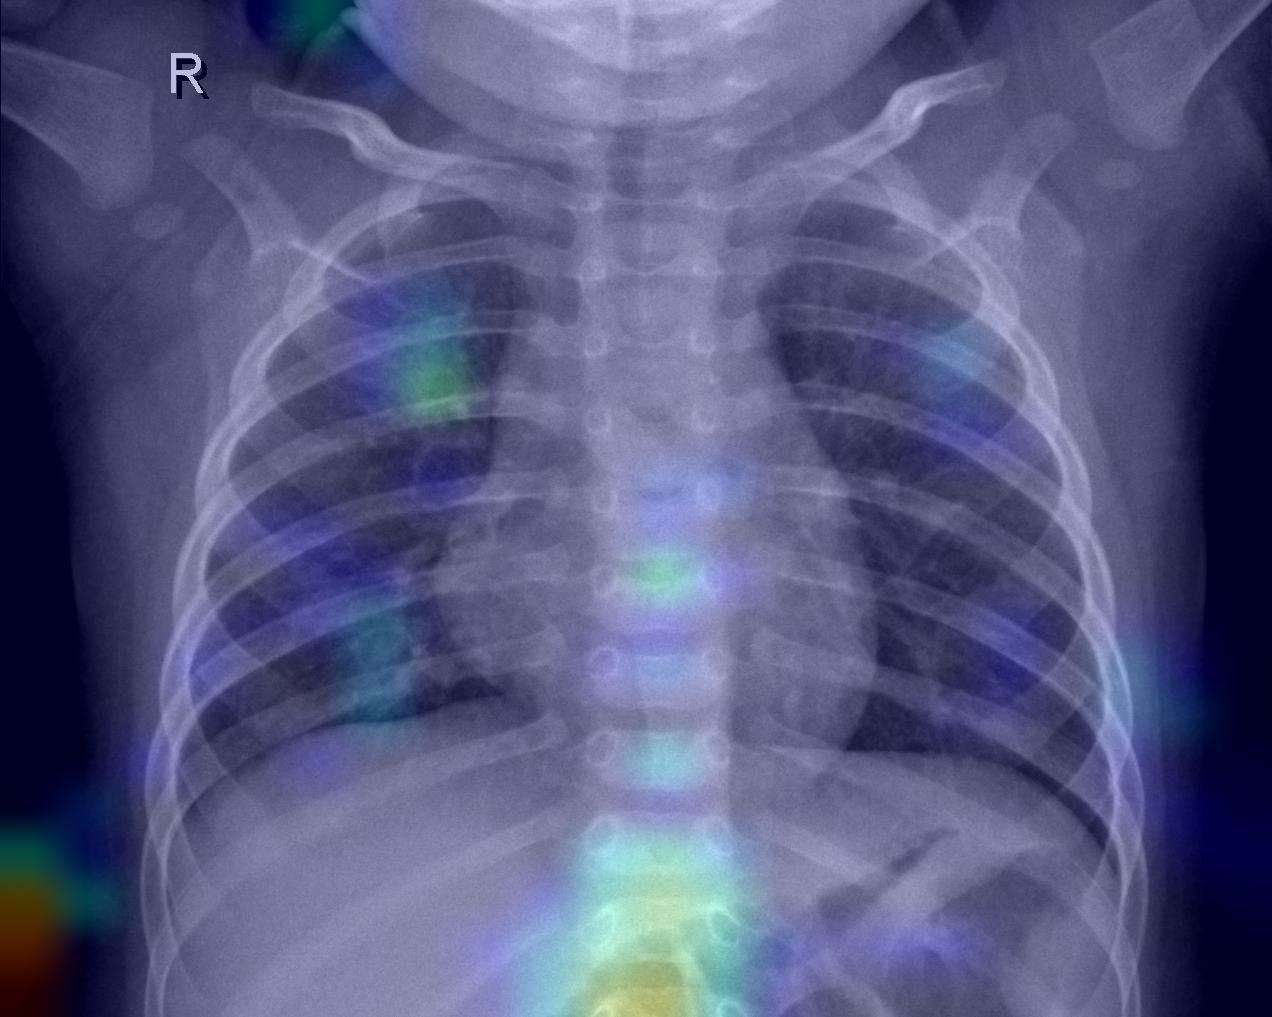

In [ ]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)

**PNEUMONIA**

In [ ]:
img_PNEUMONIA ='/content/drive/MyDrive/radiografia/chest_x_ray/test_1/PNEUMONIA/person502_bacteria_2122.jpeg'

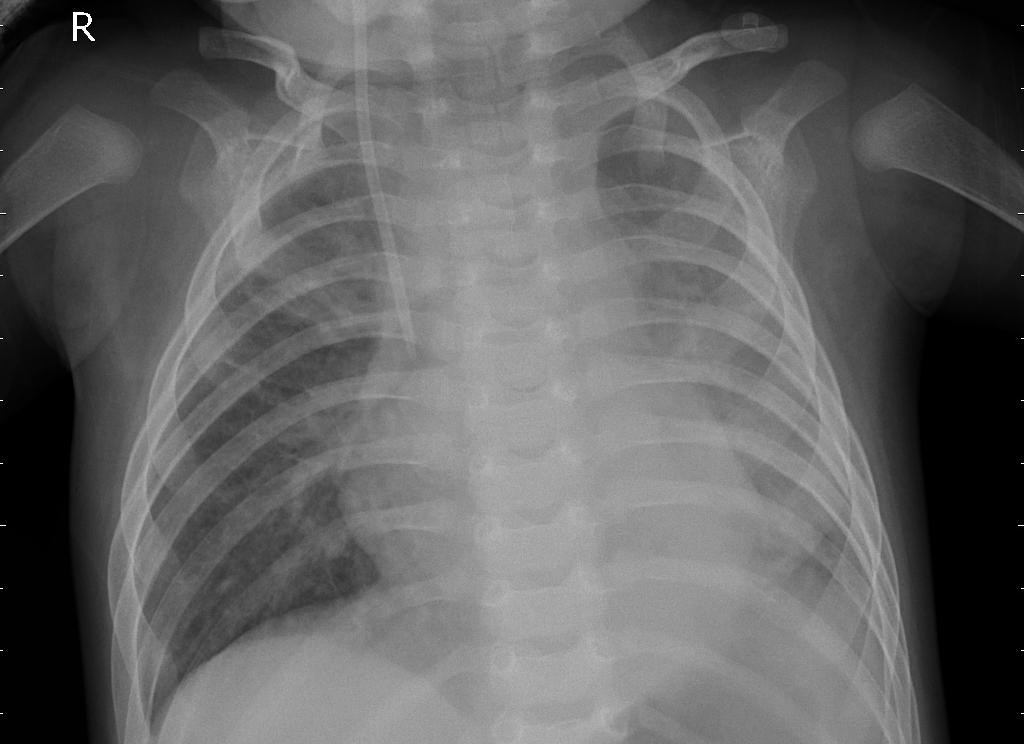

In [ ]:
img_size = (224, 224)

# The local path to our target image
img_path = img_PNEUMONIA
display(Image(img_path))

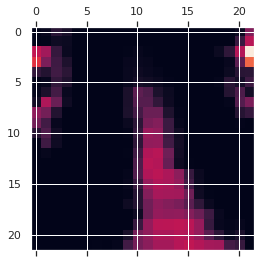

In [ ]:
#img_array = preprocess_input(get_img_array(img_path, size=img_size))
image = cv2.imread(img_path)
image = cv2.resize(image, (224, 224))
image = image.astype('float32') / 255
image = np.expand_dims(image, axis=0)
# Remove last layer's softmax
model.layers[-1].activation = None



# Generate class activation heatmap
heatmap = make_gradcam_heatmap(image, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

<ipython-input-135-34e0b9574523>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


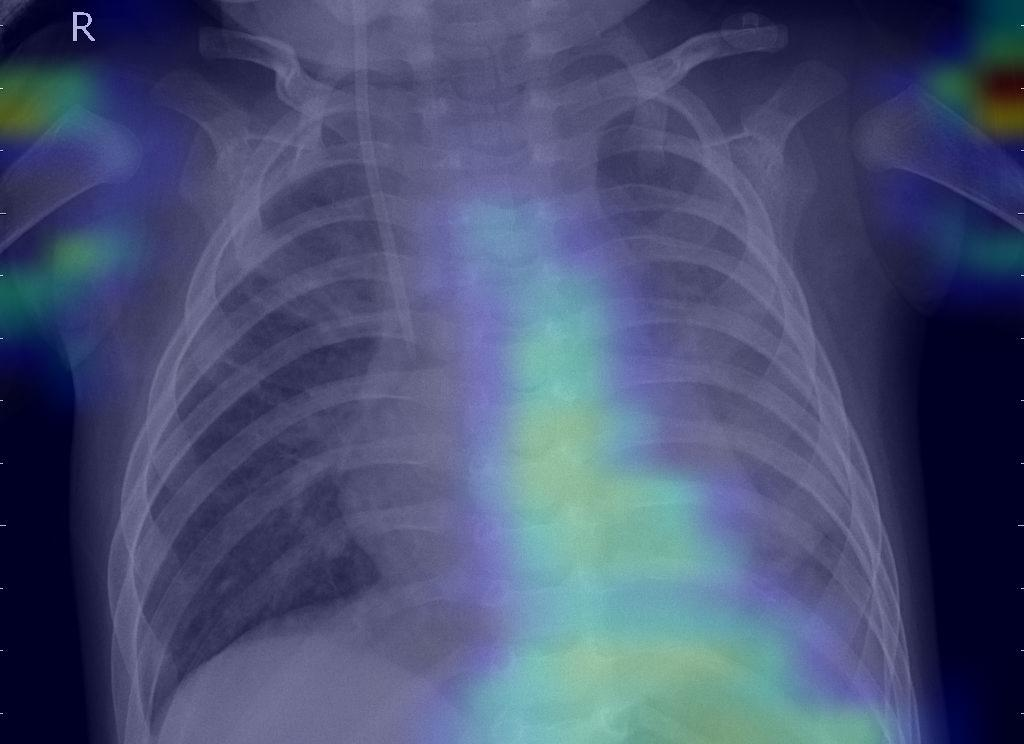

In [ ]:
save_and_display_gradcam(img_path, heatmap)

**Grad-CAM Class Activation Visualization**

In [ ]:
import cv2
class GradCAM:
    def __init__(self, model, classs, layerName=None):
        # store the model, the class index used to measure the class
        # activation map, and the layer to be used when visualizing
        # the class activation map
        self.model = model
        self.classs = classs
        self.layerName = layerName
        # if the layer name is None, attempt to automatically find
        # the target output layer
        if self.layerName is None:
            self.layerName = self.find_target_layer()

    def find_target_layer(self):
        # attempt to find the final convolutional layer in the network
        # by looping over the layers of the network in reverse order
        for layer in reversed(self.model.layers):
            # check to see if the layer has a 4D output
            if len(layer.output_shape) == 4:
                return layer.name
        # otherwise, we could not find a 4D layer so the GradCAM
        # algorithm cannot be applied
        raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")


    def compute_heatmap(self, image, eps=1e-8):
        # construct our gradient model by supplying (1) the inputs
        # to our pre-trained model, (2) the output of the (presumably)
        # final 4D layer in the network, and (3) the output of the
        # softmax activations from the model
        gradModel = Model(
            inputs=[self.model.inputs],
            outputs=[self.model.get_layer(self.layerName).output, self.model.output])

        # record operations for automatic differentiation
        with tf.GradientTape() as tape:
            # cast the image tensor to a float-32 data type, pass the
            # image through the gradient model, and grab the loss
            # associated with the specific class index
            inputs = tf.cast(image, tf.float32)
            (convOutputs, predictions) = gradModel(inputs)
            
            loss = predictions[:, tf.argmax(predictions[0])]
    
        # use automatic differentiation to compute the gradients
        grads = tape.gradient(loss, convOutputs)

        # compute the guided gradients
        castConvOutputs = tf.cast(convOutputs > 0, "float32")
        castGrads = tf.cast(grads > 0, "float32")
        guidedGrads = castConvOutputs * castGrads * grads
        # the convolution and guided gradients have a batch dimension
        # (which we don't need) so let's grab the volume itself and
        # discard the batch
        convOutputs = convOutputs[0]
        guidedGrads = guidedGrads[0]

        # compute the average of the gradient values, and using them
        # as weights, compute the ponderation of the filters with
        # respect to the weights
        weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
        cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)

        # grab the spatial dimensions of the input image and resize
        # the output class activation map to match the input image
        # dimensions
        (w, h) = (image.shape[2], image.shape[1])
        heatmap = cv2.resize(cam.numpy(), (w, h))
        # normalize the heatmap such that all values lie in the range
        # [0, 1], scale the resulting values to the range [0, 255],
        # and then convert to an unsigned 8-bit integer
        numer = heatmap - np.min(heatmap)
        denom = (heatmap.max() - heatmap.min()) + eps
        heatmap = numer / denom
        heatmap = (heatmap * 255).astype("uint8")
        # return the resulting heatmap to the calling function
        return heatmap

    def overlay_heatmap(self, heatmap, image, alpha=0.5,
                        colormap=cv2.COLORMAP_VIRIDIS):
        # apply the supplied color map to the heatmap and then
        # overlay the heatmap on the input image
        heatmap = cv2.applyColorMap(heatmap, colormap)
        output = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)
        # return a 2-tuple of the color mapped heatmap and the output,
        # overlaid image
        return (heatmap, output)

In [ ]:
# PREDICTION NORMAL
img_path = img_NORMAL
image = cv2.imread(img_path)
image = cv2.resize(image, (224, 224))
image = image.astype('float32') / 255
image = np.expand_dims(image, axis=0)

preds = model.predict(image) 
i = round(preds[0][0])

1/1 [==============================] - 0s 80ms/step


In [ ]:
icam = GradCAM(model, i, last_conv_layer_name) 
heatmap = icam.compute_heatmap(image)
heatmap = cv2.resize(heatmap, (224, 224))

image = cv2.imread(img_path)
image = cv2.resize(image, (224, 224))
print(heatmap.shape, image.shape)

(heatmap, output) = icam.overlay_heatmap(heatmap, image, alpha=0.5)

(224, 224) (224, 224, 3)


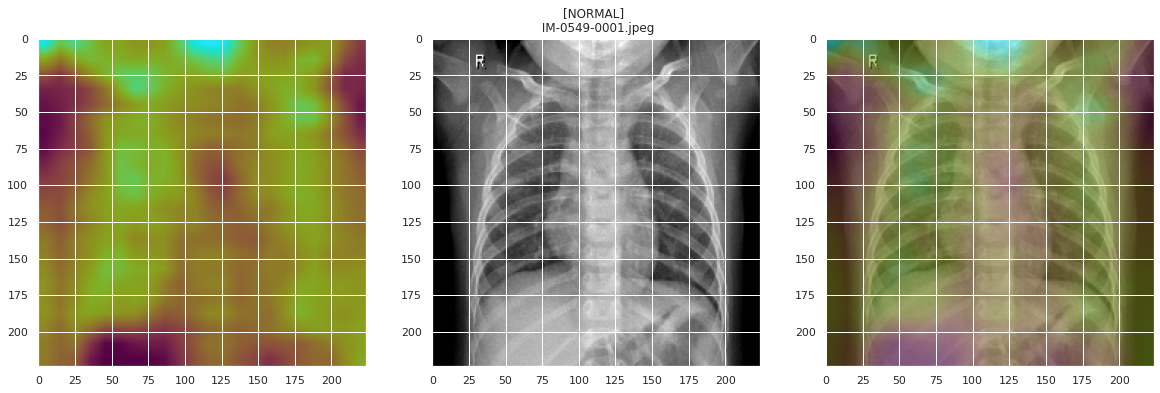

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20,7))

ax[0].imshow(heatmap)
ax[1].imshow(image)
ax[1].set_title(f"[{img_path.split('/')[-2]}] \n {img_path.split('/')[-1]}")
ax[2].imshow(output)
plt.savefig('gradcam1.png', bbox_inches='tight', dpi=300);

In [ ]:
# PREDICTION PNEUMONIA
img_path = img_PNEUMONIA
image = cv2.imread(img_path)
image = cv2.resize(image, (224, 224))
image = image.astype('float32') / 255
image = np.expand_dims(image, axis=0)

preds = model.predict(image) 
i = round(preds[0][0])

1/1 [==============================] - 0s 20ms/step


In [ ]:
icam = GradCAM(model, i, last_conv_layer_name) 
heatmap = icam.compute_heatmap(image)
heatmap = cv2.resize(heatmap, (224, 224))

image = cv2.imread(img_path)
image = cv2.resize(image, (224, 224))
print(heatmap.shape, image.shape)

(heatmap, output) = icam.overlay_heatmap(heatmap, image, alpha=0.5)

(224, 224) (224, 224, 3)


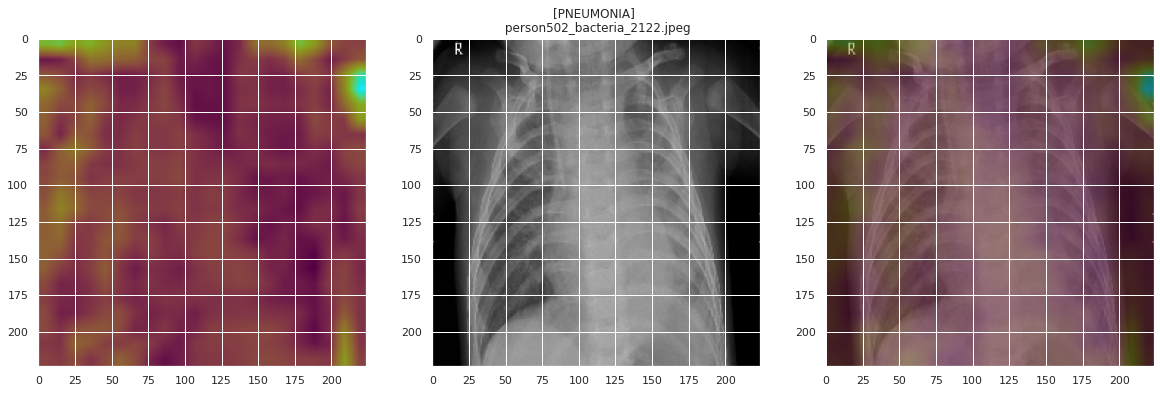

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20,7))

ax[0].imshow(heatmap)
ax[1].imshow(image)
ax[1].set_title(f"[{img_path.split('/')[-2]}] \n {img_path.split('/')[-1]}")
ax[2].imshow(output)
plt.savefig('gradcam1.png', bbox_inches='tight', dpi=300);